In [1]:
import pandas as pd
import glob

# Path to the folder containing the CSV files (you can adjust this)
path = '../version_crawls'

# Get a list of all CSV files in the folder
all_files = glob.glob(path + "/*.csv")
print(all_files)

df_list = [pd.read_csv(file) for file in all_files]

t = 0
for df in df_list:
    print(len(df))
    t += len(df)

print(t)

# Read all CSV files and concatenate them into a single DataFrame
df_versions = pd.concat(df_list, ignore_index=True)

# Display the combined DataFrame
df_versions

['../version_crawls/Crates.csv', '../version_crawls/NPM.csv', '../version_crawls/Composer.csv', '../version_crawls/PyPI.csv', '../version_crawls/Go.csv', '../version_crawls/RubyGems.csv', '../version_crawls/NuGet.csv', '../version_crawls/Maven.csv']
1386
8032
4491
3965
2589
1157
1465
5921
29006


ID  \
0       SNYK-RUST-YOUKI-6220004   
1      SNYK-RUST-PUBNUB-6098378   
2        SNYK-RUST-DENO-3315970   
3       SNYK-RUST-OPCUA-2988751   
4       SNYK-RUST-OPCUA-2988750   
...                         ...   
29001       GHSA-3g5w-6pw7-6hrp   
29002       GHSA-3ppr-72x5-x67q   
29003       GHSA-3xh5-8hvq-rc8x   
29004       GHSA-2jpx-h8j2-g8m4   
29005       GHSA-2pj2-gchf-wmw7   

                                                 Package       CWE  \
0                                                  youki   CWE-270   
1                                                 pubnub   CWE-331   
2                                                   deno  CWE-1333   
3                                                  opcua   CWE-400   
4                                                  opcua   CWE-400   
...                                                  ...       ...   
29001                         org.glassfish.main.web:web    CWE-22   
29002                    org.jvnet.hudson.plugins:mstest   CWE-776   
29003       org.apache.dolphinscheduler:dolphinscheduler    CWE-20   
29004  com.cloudbees.jenkins.plugins:kubernetes-crede...       NaN   
29005                            net.lingala.zip4j:zip4j   CWE-346   

              Date Platform                  Version Range  \
0       1 Feb 2024   Crates                         <0.3.2   
1       5 Dec 2023   Crates                         <0.4.0   
2      24 Feb 2023   Crates                        <1.31.0   
3      22 Aug 2022   Crates                        <0.11.0   
4      22 Aug 2022   Crates                        <0.11.0   
...            ...      ...                            ...   
29001  27 Jan 2023    Maven                  [5.1.0,7.0.0)   
29002  26 Jan 2023    Maven                      [0,1.0.1)   
29003   4 Jan 2023    Maven  [0,3.0.2)[3.1.0,3.1.1)[3.1.0]   
29004  26 Jan 2023    Maven           [0,1.209.v862c6e5fb)   
29005  10 Jan 2023    Maven                     [0,2.11.3)   

                                       GitHub URL  \
0             https://github.com/containers/youki   
1            https://github.com/pubnub/javascript   
2                https://github.com/denoland/deno   
3                https://github.com/locka99/opcua   
4                https://github.com/locka99/opcua   
...                                           ...   
29001   https://github.com/eclipse-ee4j/glassfish   
29002                                         NaN   
29003  https://github.com/apache/dolphinscheduler   
29004                                         NaN   
29005   https://github.com/srikanth-lingala/zip4j   

                                                Versions  CVE Source  
0      [{'number': '0.0.4', 'published_at': '2022-12-...  NaN    NaN  
1                                                    404  NaN    NaN  
2      [{'number': '0.0.1', 'published_at': '2018-09-...  NaN    NaN  
3                                                    404  NaN    NaN  
4                                                    404  NaN    NaN  
...                                                  ...  ...    ...  
29001  [{'number': '3.1.2', 'published_at': '2012-02-...  NaN    NaN  
29002  [{'number': '0.1', 'published_at': '2009-02-01...  NaN    NaN  
29003  [{'number': '1.2.0', 'published_at': '2019-12-...  NaN    NaN  
29004                                                404  NaN    NaN  
29005  [{'number': '1.2.3', 'published_at': '2011-05-...  NaN    NaN  

[29006 rows x 10 columns]

In [2]:
# List of values to remove
values_to_remove = [404, '502', '404', '[]']

# Remove rows where the 'Versions' column contains any of the values in the 'values_to_remove' list
df_available_versions_cleaned = df_versions[~df_versions['Versions'].isin(values_to_remove)]

# Reset the index after cleaning
df_available_versions_cleaned.reset_index(drop=True, inplace=True)

# print([i for i in list(set(df_available_versions_cleaned['Versions'].tolist())) if len(str(i))<10])
df_versions = df_available_versions_cleaned

# Meta Data Analysis

In [5]:
import ast
from datetime import datetime

# Function to convert the version string to a list of dictionaries
def get_metadata_from_versions(version_str):
    version_list = ast.literal_eval(version_str)
    version_list = sorted(version_list, key=lambda x: x['published_at'])


    first_version_date = version_list[0]['published_at']
    first_version_date = datetime.strptime(first_version_date, "%Y-%m-%dT%H:%M:%S.%fZ")
    last_version_date = version_list[-1]['published_at']
    last_version_date = datetime.strptime(last_version_date, "%Y-%m-%dT%H:%M:%S.%fZ")
    

    total_days = (last_version_date - first_version_date).days
    
    return total_days, len(version_list)

df_versions['versions_metadata'] = df_versions['Versions'].apply(get_metadata_from_versions)

# total_versions = get_metadata_from_versions(matching_row['Versions'])

# total_versions = sorted(total_versions, key=lambda x: x['published_at'])
df_versions

/tmp/ipykernel_2064430/1097069423.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_versions['versions_metadata'] = df_versions['Versions'].apply(get_metadata_from_versions)


ID  \
0        SNYK-RUST-YOUKI-6220004   
1         SNYK-RUST-DENO-3315970   
2       SNYK-RUST-COMRAK-1279044   
3      SNYK-RUST-TINYHTTP-569106   
4      SNYK-RUST-TINYHTTP-573057   
...                          ...   
26666        GHSA-38m2-vr6g-8c94   
26667        GHSA-3g5w-6pw7-6hrp   
26668        GHSA-3ppr-72x5-x67q   
26669        GHSA-3xh5-8hvq-rc8x   
26670        GHSA-2pj2-gchf-wmw7   

                                            Package       CWE         Date  \
0                                             youki   CWE-270   1 Feb 2024   
1                                              deno  CWE-1333  24 Feb 2023   
2                                            comrak    CWE-79   4 May 2021   
3                                         tiny-http   CWE-200  16 Jun 2020   
4                                         tiny_http   CWE-200  16 Jun 2020   
...                                             ...       ...          ...   
26666         org.apache.sling:org.apache.sling.cms    CWE-79   9 Jan 2023   
26667                    org.glassfish.main.web:web    CWE-22  27 Jan 2023   
26668               org.jvnet.hudson.plugins:mstest   CWE-776  26 Jan 2023   
26669  org.apache.dolphinscheduler:dolphinscheduler    CWE-20   4 Jan 2023   
26670                       net.lingala.zip4j:zip4j   CWE-346  10 Jan 2023   

      Platform                  Version Range  \
0       Crates                         <0.3.2   
1       Crates                        <1.31.0   
2       Crates                        <0.10.1   
3       Crates                            NaN   
4       Crates                         <0.8.0   
...        ...                            ...   
26666    Maven                      [0,1.1.4)   
26667    Maven                  [5.1.0,7.0.0)   
26668    Maven                      [0,1.0.1)   
26669    Maven  [0,3.0.2)[3.1.0,3.1.1)[3.1.0]   
26670    Maven                     [0,2.11.3)   

                                       GitHub URL  \
0             https://github.com/containers/youki   
1                https://github.com/denoland/deno   
2              https://github.com/kivikakk/comrak   
3          https://github.com/tiny-http/tiny-http   
4                                             NaN   
...                                           ...   
26666                                         NaN   
26667   https://github.com/eclipse-ee4j/glassfish   
26668                                         NaN   
26669  https://github.com/apache/dolphinscheduler   
26670   https://github.com/srikanth-lingala/zip4j   

                                                Versions  CVE Source  \
0      [{'number': '0.0.4', 'published_at': '2022-12-...  NaN    NaN   
1      [{'number': '0.0.1', 'published_at': '2018-09-...  NaN    NaN   
2      [{'number': '0.1.0', 'published_at': '2017-04-...  NaN    NaN   
3      [{'number': '1.0.0', 'published_at': '2015-06-...  NaN    NaN   
4      [{'number': '0.1.0', 'published_at': '2015-05-...  NaN    NaN   
...                                                  ...  ...    ...   
26666  [{'number': '0.10.0', 'published_at': '2018-09...  NaN    NaN   
26667  [{'number': '3.1.2', 'published_at': '2012-02-...  NaN    NaN   
26668  [{'number': '0.1', 'published_at': '2009-02-01...  NaN    NaN   
26669  [{'number': '1.2.0', 'published_at': '2019-12-...  NaN    NaN   
26670  [{'number': '1.2.3', 'published_at': '2011-05-...  NaN    NaN   

      versions_metadata  
0             (764, 12)  
1           (2318, 272)  
2            (2828, 76)  
3             (155, 21)  
4            (2709, 30)  
...                 ...  
26666        (1927, 15)  
26667        (4703, 66)  
26668          (375, 5)  
26669        (1504, 45)  
26670        (4304, 51)  

[26671 rows x 11 columns]

In [6]:
version_list = df_versions['versions_metadata'].tolist()
platforms =  df_versions['Platform'].tolist()

avg_dict = {}

for i, (days, n_versions) in enumerate(version_list):
    plt = platforms[i]
    if days <= 0:
        continue

    if plt in avg_dict:
        avg_dict[plt] = (avg_dict[plt] + (n_versions/days)) / 2 
    else:
        avg_dict[plt] = (n_versions/days)
    

avg_dict
    

{'Crates': 0.034831816604017726,
 'NPM': 0.06714828542038229,
 'Composer': 0.017911692874266128,
 'PyPI': 0.02297966833265503,
 'Go': 0.14882747110779818,
 'RubyGems': 0.06667709116358043,
 'NuGet': 0.020417273178443378,
 'Maven': 0.017162532200237793}

# Package Versions Analysis

In [16]:
file = '../data/snyk_and_advisory.csv'
df_combined = pd.read_csv(file)
df_combined = df_combined.drop_duplicates(subset=['ID'])

df_combined


ID  \
0                   SNYK-DOTNET-MAGICKNETCORE-7856102   
1      SNYK-DOTNET-SERILOGENRICHERSCLIENTINFO-7853254   
2                       SNYK-DOTNET-RESTSHARP-7853196   
3                    SNYK-DOTNET-BOUNCYCASTLE-7831269   
4        SNYK-DOTNET-BOUNCYCASTLECRYPTOGRAPHY-7831268   
...                                               ...   
28148                             GHSA-2pj2-gchf-wmw7   
28149                             GHSA-2x48-p6cq-5xcw   
28150                             GHSA-3244-8mff-w398   
28151                             GHSA-33gv-rvgq-gpxp   
28152                             GHSA-34p5-jp77-fcrc   

                            Package      CWE             CVE         Date  \
0                   magick.net.core  CWE-122   CVE-2023-4863   1 Sep 2024   
1      serilog.enrichers.clientinfo  CWE-348  CVE-2024-44930  30 Aug 2024   
2                         restsharp  CWE-113  CVE-2024-45302  30 Aug 2024   
3                      bouncycastle  CWE-835  CVE-2024-30172  26 Aug 2024   
4         bouncycastle.cryptography  CWE-835  CVE-2024-30172  26 Aug 2024   
...                             ...      ...             ...          ...   
28148       net.lingala.zip4j:zip4j  CWE-346  CVE-2023-22899  10 Jan 2023   
28149     github.com/go-sonic/sonic   CWE-22  CVE-2022-46959  23 Jan 2023   
28150      github.com/gotify/server   CWE-79             NaN  10 Jan 2023   
28151           BTCPayServer.Client   CWE-74   CVE-2023-0493  27 Jan 2023   
28152    github.com/rancher/rancher   CWE-77  CVE-2022-43758  25 Jan 2023   

      Platform                              Version Range  \
0        NuGet                              ['[,13.3.0)']   
1        NuGet                               ['[,2.1.0)']   
2        NuGet            ['[107.0.0-preview.1,112.0.0)']   
3        NuGet                                   ['[0,]']   
4        NuGet                               ['[,2.3.1)']   
...        ...                                        ...   
28148    Maven                                 [0,2.11.3)   
28149       Go                                  [0,1.0.5)   
28150       Go                                  [0,2.2.3)   
28151    NuGet                                  [0,1.7.5)   
28152       Go  [2.5.0,2.5.17)[2.6.0,2.6.10)[2.7.0,2.7.1)   

                                              GitHub URL Source  
0                 https://github.com/dlemstra/Magick.NET   Snyk  
1      https://github.com/serilog-contrib/serilog-enr...   Snyk  
2                 https://github.com/restsharp/RestSharp   Snyk  
3                                                    NaN   Snyk  
4                                                    NaN   Snyk  
...                                                  ...    ...  
28148          https://github.com/srikanth-lingala/zip4j    Git  
28149                  https://github.com/go-sonic/sonic    Git  
28150                   https://github.com/gotify/server    Git  
28151       https://github.com/btcpayserver/btcpayserver    Git  
28152                 https://github.com/rancher/rancher    Git  

[28153 rows x 9 columns]

# Parse Versions from Mulitple Sources

In [17]:
import pandas as pd
import re
import ast

def normalize_version_ranges(version_ranges):
    normalized = []
    version_ranges = str(version_ranges)

    if 'nan' in str(version_ranges):
        return None
    elif '*' in str(version_ranges):
        return '*'
    elif '[0,]' in str(version_ranges):
        return '*'
    elif '[0.0,]' in str(version_ranges):
        return '*'
    elif '[,]' in str(version_ranges):
        return '*'

        

    try:
        version_ranges = ast.literal_eval(version_ranges)
    except (ValueError, SyntaxError):
        # print('first conversion error', version_ranges, type(version_ranges))
        return version_ranges

    first_int = True
    for item in version_ranges:
        # print()
        # print(item, type(item))

        if isinstance(item, int) or isinstance(item, float):
            if first_int:
                start = item
                first_int = False
            else:
                end = item
                first_int = True
                normalized.append(f"[{start},{end})")
            continue

        
        try:
            ranges = ast.literal_eval(item) if isinstance(item, str) else item
            # print('xxxxxxxxxxxxxxxxxxxxxxxxx', ranges == item)
        except (ValueError, SyntaxError):
            # print('Conversion Error',type(item), item)
            ranges = [item]
            # continue
        # print('-----', type(ranges), ranges)
        
        for version_range in ranges:
            # print('-----', type(version_range), version_range)
            

            if type(version_range) == type(1) or type(version_range) == type(1.0):
                if item.startswith('['):
                    start, end = version_range, "10000"  # Open-ended upper range
                elif item.startswith('[,'):
                    start, end = "0", version_range

            # elif len(version_range) == 2:
            #     if all(isinstance(x, int) for x in version_range) or all(isinstance(x, float) for x in version_range):
            #         start, end = version_range[0], version_range[1]
                
            elif '[' in version_range or '(' in version_range:
                match = re.findall(r'[0-9.\-_a-zA-Z*]+', version_range)
                # print(match)
                if len(match) == 1:  # Case like [,x)
                    if version_range.startswith('[,'):
                        start, end = "0", match[0]
                    elif version_range.startswith('['):
                        start, end = match[0], "10000"  # Open-ended upper range
                elif len(match) == 2:  # Case like [x,y)
                    start, end = match
            elif '<' in version_range or '>=' in version_range:
                if '<' in version_range and '>=' in version_range:  # Case like >=y <z
                    parts = re.findall(r'[0-9.\-_a-zA-Z*]+', version_range)
                    if len(parts) == 2:
                        start, end = parts[0], parts[1]
                    else:
                        continue
                elif '<' in version_range:  # Case like <x
                    start, end = "0", re.findall(r'[0-9.\-_a-zA-Z*]+', version_range)[0]
                elif '>=' in version_range:  # Case like >=y
                    start, end = re.findall(r'[0-9.\-_a-zA-Z*]+', version_range)[0], "10000"
                    continue
            else:
                continue
            normalized.append(f"[{start},{end})")
    return ''.join(normalized)

# # Example DataFrame
# data = {
#     "Version Range": [
#         "[2.5.0,2.5.17)[2.6.0,2.6.10)[2.7.0,2.7.1)",
#         "['[107.0.0-preview.1,112.0.0)']",
#         "['[,5.5.4)', '[6.0.0,7.0.6)']",
#         "['<2.5.4', '>=3.0.0 <3.1.3']",
#         "['[8.0.0, 8.0.8)']",
#         "['[0,]']",
#         "['[3.5,]']",
#     ]
# }

# df = pd.DataFrame(data)

# # Apply the normalization function
# df['Normalized Version Range'] = df['Version Range'].apply(
#     lambda x: normalize_version_ranges([x]) if isinstance(x, str) else normalize_version_ranges(x)
# )

# df

In [18]:
df_combined["Converted Version Range"] = df_combined["Version Range"].apply(normalize_version_ranges)

df_combined


ID  \
0                   SNYK-DOTNET-MAGICKNETCORE-7856102   
1      SNYK-DOTNET-SERILOGENRICHERSCLIENTINFO-7853254   
2                       SNYK-DOTNET-RESTSHARP-7853196   
3                    SNYK-DOTNET-BOUNCYCASTLE-7831269   
4        SNYK-DOTNET-BOUNCYCASTLECRYPTOGRAPHY-7831268   
...                                               ...   
28148                             GHSA-2pj2-gchf-wmw7   
28149                             GHSA-2x48-p6cq-5xcw   
28150                             GHSA-3244-8mff-w398   
28151                             GHSA-33gv-rvgq-gpxp   
28152                             GHSA-34p5-jp77-fcrc   

                            Package      CWE             CVE         Date  \
0                   magick.net.core  CWE-122   CVE-2023-4863   1 Sep 2024   
1      serilog.enrichers.clientinfo  CWE-348  CVE-2024-44930  30 Aug 2024   
2                         restsharp  CWE-113  CVE-2024-45302  30 Aug 2024   
3                      bouncycastle  CWE-835  CVE-2024-30172  26 Aug 2024   
4         bouncycastle.cryptography  CWE-835  CVE-2024-30172  26 Aug 2024   
...                             ...      ...             ...          ...   
28148       net.lingala.zip4j:zip4j  CWE-346  CVE-2023-22899  10 Jan 2023   
28149     github.com/go-sonic/sonic   CWE-22  CVE-2022-46959  23 Jan 2023   
28150      github.com/gotify/server   CWE-79             NaN  10 Jan 2023   
28151           BTCPayServer.Client   CWE-74   CVE-2023-0493  27 Jan 2023   
28152    github.com/rancher/rancher   CWE-77  CVE-2022-43758  25 Jan 2023   

      Platform                              Version Range  \
0        NuGet                              ['[,13.3.0)']   
1        NuGet                               ['[,2.1.0)']   
2        NuGet            ['[107.0.0-preview.1,112.0.0)']   
3        NuGet                                   ['[0,]']   
4        NuGet                               ['[,2.3.1)']   
...        ...                                        ...   
28148    Maven                                 [0,2.11.3)   
28149       Go                                  [0,1.0.5)   
28150       Go                                  [0,2.2.3)   
28151    NuGet                                  [0,1.7.5)   
28152       Go  [2.5.0,2.5.17)[2.6.0,2.6.10)[2.7.0,2.7.1)   

                                              GitHub URL Source  \
0                 https://github.com/dlemstra/Magick.NET   Snyk   
1      https://github.com/serilog-contrib/serilog-enr...   Snyk   
2                 https://github.com/restsharp/RestSharp   Snyk   
3                                                    NaN   Snyk   
4                                                    NaN   Snyk   
...                                                  ...    ...   
28148          https://github.com/srikanth-lingala/zip4j    Git   
28149                  https://github.com/go-sonic/sonic    Git   
28150                   https://github.com/gotify/server    Git   
28151       https://github.com/btcpayserver/btcpayserver    Git   
28152                 https://github.com/rancher/rancher    Git   

                         Converted Version Range  
0                                     [0,13.3.0)  
1                                      [0,2.1.0)  
2                    [107.0.0-preview.1,112.0.0)  
3                                              *  
4                                      [0,2.3.1)  
...                                          ...  
28148                                 [0,2.11.3)  
28149                                  [0,1.0.5)  
28150                                  [0,2.2.3)  
28151                                  [0,1.7.5)  
28152  [2.5.0,2.5.17)[2.6.0,2.6.10)[2.7.0,2.7.1)  

[28153 rows x 10 columns]

In [19]:
values_to_remove = ['', 'nan']
# Apply the function to the 'Version Range' column
# df_combined["Converted Version Range"] = df_combined["Version Range"].apply(convert_version_format)
df_combined = df_combined[~df_combined['Converted Version Range'].isin(values_to_remove)]
df_combined = df_combined.dropna(subset=['Converted Version Range'])
df_combined


# Apply the function to the 'Version Range' column
# df_combined["Converted Version Range"] = df_combined["Version Range"].apply(convert_version_format)
# df_combined

ID  \
0                   SNYK-DOTNET-MAGICKNETCORE-7856102   
1      SNYK-DOTNET-SERILOGENRICHERSCLIENTINFO-7853254   
2                       SNYK-DOTNET-RESTSHARP-7853196   
3                    SNYK-DOTNET-BOUNCYCASTLE-7831269   
4        SNYK-DOTNET-BOUNCYCASTLECRYPTOGRAPHY-7831268   
...                                               ...   
28148                             GHSA-2pj2-gchf-wmw7   
28149                             GHSA-2x48-p6cq-5xcw   
28150                             GHSA-3244-8mff-w398   
28151                             GHSA-33gv-rvgq-gpxp   
28152                             GHSA-34p5-jp77-fcrc   

                            Package      CWE             CVE         Date  \
0                   magick.net.core  CWE-122   CVE-2023-4863   1 Sep 2024   
1      serilog.enrichers.clientinfo  CWE-348  CVE-2024-44930  30 Aug 2024   
2                         restsharp  CWE-113  CVE-2024-45302  30 Aug 2024   
3                      bouncycastle  CWE-835  CVE-2024-30172  26 Aug 2024   
4         bouncycastle.cryptography  CWE-835  CVE-2024-30172  26 Aug 2024   
...                             ...      ...             ...          ...   
28148       net.lingala.zip4j:zip4j  CWE-346  CVE-2023-22899  10 Jan 2023   
28149     github.com/go-sonic/sonic   CWE-22  CVE-2022-46959  23 Jan 2023   
28150      github.com/gotify/server   CWE-79             NaN  10 Jan 2023   
28151           BTCPayServer.Client   CWE-74   CVE-2023-0493  27 Jan 2023   
28152    github.com/rancher/rancher   CWE-77  CVE-2022-43758  25 Jan 2023   

      Platform                              Version Range  \
0        NuGet                              ['[,13.3.0)']   
1        NuGet                               ['[,2.1.0)']   
2        NuGet            ['[107.0.0-preview.1,112.0.0)']   
3        NuGet                                   ['[0,]']   
4        NuGet                               ['[,2.3.1)']   
...        ...                                        ...   
28148    Maven                                 [0,2.11.3)   
28149       Go                                  [0,1.0.5)   
28150       Go                                  [0,2.2.3)   
28151    NuGet                                  [0,1.7.5)   
28152       Go  [2.5.0,2.5.17)[2.6.0,2.6.10)[2.7.0,2.7.1)   

                                              GitHub URL Source  \
0                 https://github.com/dlemstra/Magick.NET   Snyk   
1      https://github.com/serilog-contrib/serilog-enr...   Snyk   
2                 https://github.com/restsharp/RestSharp   Snyk   
3                                                    NaN   Snyk   
4                                                    NaN   Snyk   
...                                                  ...    ...   
28148          https://github.com/srikanth-lingala/zip4j    Git   
28149                  https://github.com/go-sonic/sonic    Git   
28150                   https://github.com/gotify/server    Git   
28151       https://github.com/btcpayserver/btcpayserver    Git   
28152                 https://github.com/rancher/rancher    Git   

                         Converted Version Range  
0                                     [0,13.3.0)  
1                                      [0,2.1.0)  
2                    [107.0.0-preview.1,112.0.0)  
3                                              *  
4                                      [0,2.3.1)  
...                                          ...  
28148                                 [0,2.11.3)  
28149                                  [0,1.0.5)  
28150                                  [0,2.2.3)  
28151                                  [0,1.7.5)  
28152  [2.5.0,2.5.17)[2.6.0,2.6.10)[2.7.0,2.7.1)  

[25941 rows x 10 columns]

In [20]:
import ast

# Function to convert the version string to a list of dictionaries
# Function to convert the version string to a list of dictionaries
def convert_versions_to_list(version_str):
    return ast.literal_eval(version_str)

# Function to split the version range into individual ranges
def split_version_range(version_range_str):
    # print(version_range_str)
    # Split the string by ')(' and ensure proper format
    version_ranges = version_range_str.split(')[')
    res = []

    for vr in version_ranges:
        vr = vr.replace('[', '').replace(')', ']').replace(']', '')
        # print(vr.split(','))
        if vr.split(',')[0] == '':
            vr = '0'+vr
        elif vr.split(',')[-1] == '':
            vr = vr+'1000.0.0'
        res.append(vr) 
    # version_ranges = [vr.replace('[', '').replace(')', ']').replace(']', '') for vr in version_ranges]
    # print(version_range_str, version_ranges)
    return res


def analyze_vulnerability(df_vulnerable, df_available):
    results = []

    for _, vuln_row in df_vulnerable.iterrows():
        # Find matching row in df_available
        matching_rows = df_available[df_available['Package'] == vuln_row['Package']]
        publish_date = vuln_row['Date']

        # disclosed_date = vuln_row['Disclosed'] # Load from Snyk Only to use Disclosed date.
        disclosed_date = vuln_row['Date']

        vulnerable_versions = []
        if not matching_rows.empty:  # Ensure there is at least one matching row
            matching_row = matching_rows.iloc[0]  # Take the first matching row
            # display(matching_row)
            version_range_str = vuln_row['Converted Version Range']
            
            # Split the version range into individual ranges
            version_ranges = split_version_range(version_range_str)
            # print('------', version_ranges)
            # Convert the string representation of versions to actual list of dictionaries
            
            total_versions = convert_versions_to_list(matching_row['Versions'])
            total_versions = sorted(total_versions, key=lambda x: x['published_at'])

            # print(total_versions)
            for version_range in version_ranges:
                try:
                    first_fixed_date = 'N/A'
                    first_vuln_date = 'N/A'
                    if '*' in version_range:
                        vulnerable_versions = [(publish_date, disclosed_date, total_versions[0]['number'], total_versions[0]['published_at'], 'N/A', 'N/A', len(total_versions))]
                    else:
                        vuln_count = 0
                        
                        args = version_range.split(',')
                        # min_version, max_version = args[0], args[-1]

                        first_vuln_version = args[0]
                        first_fixed_version = args[-1]
                        in_vulnerable_range = False
                        # print(args)

                        if str(first_vuln_version) == '0':
                            first_vuln_date = total_versions[0]['published_at']
                            in_vulnerable_range = True

                        # if first_fixed_version == '10000.0.0':
                        #     first_fixed_date = 'N/A'

                        for version_info in total_versions:
                            version_number = version_info['number']
                            if version_number[0] == 'v':
                                version_number = version_number[1:]
                                
                            if first_vuln_version == version_number:
                                first_vuln_date = version_info['published_at']
                                in_vulnerable_range = True

                            if first_fixed_version == version_number:
                                first_fixed_date = version_info['published_at']
                                in_vulnerable_range = False
                                break

                            if in_vulnerable_range:
                                vuln_count += 1

                        vulnerable_versions.append((publish_date, disclosed_date, first_vuln_version, first_vuln_date, first_fixed_version, first_fixed_date, vuln_count, len(total_versions)))
                except Exception as e:
                    print(e, df_available['Package'])

        results.append({
            'ID': vuln_row['ID'],
            'Package': vuln_row['Package'],
            'Platform': vuln_row['Platform'],
            'CWE': vuln_row['CWE'],
            'Vuln_version_info': vulnerable_versions
        })

    return pd.DataFrame(results)


# Apply the analysis
df_analysis = analyze_vulnerability(df_combined, df_versions)

# Show the result
df_analysis

ID  \
0                   SNYK-DOTNET-MAGICKNETCORE-7856102   
1      SNYK-DOTNET-SERILOGENRICHERSCLIENTINFO-7853254   
2                       SNYK-DOTNET-RESTSHARP-7853196   
3                    SNYK-DOTNET-BOUNCYCASTLE-7831269   
4        SNYK-DOTNET-BOUNCYCASTLECRYPTOGRAPHY-7831268   
...                                               ...   
25936                             GHSA-2pj2-gchf-wmw7   
25937                             GHSA-2x48-p6cq-5xcw   
25938                             GHSA-3244-8mff-w398   
25939                             GHSA-33gv-rvgq-gpxp   
25940                             GHSA-34p5-jp77-fcrc   

                            Package Platform      CWE  \
0                   magick.net.core    NuGet  CWE-122   
1      serilog.enrichers.clientinfo    NuGet  CWE-348   
2                         restsharp    NuGet  CWE-113   
3                      bouncycastle    NuGet  CWE-835   
4         bouncycastle.cryptography    NuGet  CWE-835   
...                             ...      ...      ...   
25936       net.lingala.zip4j:zip4j    Maven  CWE-346   
25937     github.com/go-sonic/sonic       Go   CWE-22   
25938      github.com/gotify/server       Go   CWE-79   
25939           BTCPayServer.Client    NuGet   CWE-74   
25940    github.com/rancher/rancher       Go   CWE-77   

                                       Vuln_version_info  
0      [(1 Sep 2024, 1 Sep 2024, 0, 2020-06-01T09:37:...  
1      [(30 Aug 2024, 30 Aug 2024, 0, 2020-01-05T20:4...  
2      [(30 Aug 2024, 30 Aug 2024, 107.0.0-preview.1,...  
3      [(26 Aug 2024, 26 Aug 2024, 1.7.0, 2011-04-30T...  
4      [(26 Aug 2024, 26 Aug 2024, 0, 2022-11-15T07:3...  
...                                                  ...  
25936  [(10 Jan 2023, 10 Jan 2023, 0, 2011-05-11T16:4...  
25937  [(23 Jan 2023, 23 Jan 2023, 0, 2022-11-06T14:5...  
25938  [(10 Jan 2023, 10 Jan 2023, 0, 2018-02-21T18:3...  
25939  [(27 Jan 2023, 27 Jan 2023, 0, 2020-04-25T21:0...  
25940  [(25 Jan 2023, 25 Jan 2023, 2.5.0, N/A, 2.5.17...  

[25941 rows x 5 columns]

In [21]:
from datetime import datetime

# Helper function to filter out fixed vulnerabilities
def is_fixed(vuln_info):
    print(vuln_info)
    # print(vuln_info[0][3])
    # vuln_info = ast.literal_eval(vuln_info)
    flag = True
    for v in vuln_info:
        if v[5] == "N/A":
            flag = False
            break
            
        if v[3] == "N/A":
            flag = False
            break
        
    return flag
    # res = any(v[3] != "N/A" for v in vuln_info) or any(v[1] != "N/A" for v in vuln_info)
    # print(vuln_info, res)
    # return 

# Filter rows where vulnerability is fixed and Vuln_version_info is not empty
df_filtered = df_analysis[df_analysis["Vuln_version_info"].apply(lambda x: x != [] and is_fixed(x))]

# Function to calculate the average time to fix vulnerabilities
def avg_time_to_fix(vuln_info):
    times_to_fix = []
    times_to_fix_disclosed = []
    times_to_fix_publish = []
    for vuln in vuln_info:
        first_vuln_date = datetime.strptime(vuln[3], "%Y-%m-%dT%H:%M:%S.%fZ")
        first_fixed_date = datetime.strptime(vuln[5], "%Y-%m-%dT%H:%M:%S.%fZ")
        publish_date = datetime.strptime(vuln[0], "%d %b %Y")
        disclosed_date = datetime.strptime(vuln[1], "%d %b %Y")
        time_to_fix = (first_fixed_date - first_vuln_date).days
        time_to_fix_disclosed = (first_fixed_date - disclosed_date).days
        time_to_fix_publish = (first_fixed_date - publish_date).days
        
        times_to_fix.append(time_to_fix)
        times_to_fix_disclosed.append(time_to_fix_disclosed)
        times_to_fix_publish.append(time_to_fix_publish)
    res1 = sum(times_to_fix) / len(times_to_fix) if times_to_fix else 0
    res2 = sum(times_to_fix_disclosed) / len(times_to_fix_disclosed) if times_to_fix_disclosed else 0
    res3 = sum(times_to_fix_publish) / len(times_to_fix_publish) if times_to_fix_publish else 0
    return (res1, res2, res3)

# Apply the average time calculation to the DataFrame
df_filtered["Avg_time_to_fix"] = df_filtered["Vuln_version_info"].apply(avg_time_to_fix)

# Analyze the number of vuln_count across platforms
vuln_count_by_platform = df_filtered.explode("Vuln_version_info").groupby(["Platform", "Package"]).agg(
    total_vuln_count=("Vuln_version_info", lambda x: sum(v[6] for v in x)),
    total_versions=("Vuln_version_info", lambda x: sum(v[7] for v in x))
).reset_index()

# Display the results
print("Vulnerability Count by Platform:")
display(vuln_count_by_platform)

print("\nAverage Time to Fix Vulnerabilities:")
display(df_filtered[["ID", "CWE", "Platform", "Package", "Avg_time_to_fix"]])

[('1 Sep 2024', '1 Sep 2024', '0', '2020-06-01T09:37:20.820Z', '13.3.0', '2023-09-21T11:02:01.947Z', 58, 72)]
[('30 Aug 2024', '30 Aug 2024', '0', '2020-01-05T20:48:33.593Z', '2.1.0', '2024-07-18T21:16:44.033Z', 13, 16)]
[('30 Aug 2024', '30 Aug 2024', '107.0.0-preview.1', '2021-12-13T18:23:04.820Z', '112.0.0', 'N/A', 192, 339)]
[('26 Aug 2024', '26 Aug 2024', '1.7.0', '2011-04-30T06:17:34.270Z', 'N/A', 'N/A', 10)]
[('26 Aug 2024', '26 Aug 2024', '0', '2022-11-15T07:37:13.123Z', '2.3.1', '2024-05-07T16:19:10.430Z', 7, 14)]
[('26 Aug 2024', '26 Aug 2024', '1.7.0', '2011-04-30T06:17:34.270Z', 'N/A', 'N/A', 10)]
[('26 Aug 2024', '26 Aug 2024', '0', '2022-11-15T07:37:13.123Z', '2.3.1', '2024-05-07T16:19:10.430Z', 7, 14)]
[('25 Aug 2024', '25 Aug 2024', '14.0.0', '2024-05-30T06:07:21.753Z', '14.1.2', '2024-08-20T05:33:59.960Z', 12, 171)]
[('25 Aug 2024', '25 Aug 2024', '14.0.0', '2024-05-30T06:06:41.487Z', '14.1.2', '2024-08-20T05:33:25.033Z', 8, 27)]
[('21 Aug 2024', '21 Aug 2024', '14.0.0

/tmp/ipykernel_2064430/3786809245.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Avg_time_to_fix"] = df_filtered["Vuln_version_info"].apply(avg_time_to_fix)


Vulnerability Count by Platform:


Platform                   Package  total_vuln_count  total_versions
0     Composer           admidio/admidio               198             380
1     Composer           adodb/adodb-php                53             156
2     Composer  airesvsg/acf-to-rest-api                 5              10
3     Composer       akaunting/akaunting               109             150
4     Composer  akeneo/pim-community-dev              1007            2344
...        ...                       ...               ...             ...
6283  RubyGems                    wicked                21              34
6284  RubyGems             will_paginate                17              40
6285  RubyGems               xapian-core                14              16
6286  RubyGems                 yajl-ruby               123             132
6287  RubyGems                      yard               228             276

[6288 rows x 4 columns]


Average Time to Fix Vulnerabilities:


ID       CWE  Platform  \
0                   SNYK-DOTNET-MAGICKNETCORE-7856102   CWE-122     NuGet   
1      SNYK-DOTNET-SERILOGENRICHERSCLIENTINFO-7853254   CWE-348     NuGet   
4        SNYK-DOTNET-BOUNCYCASTLECRYPTOGRAPHY-7831268   CWE-835     NuGet   
6        SNYK-DOTNET-BOUNCYCASTLECRYPTOGRAPHY-7831266   CWE-203     NuGet   
7             SNYK-DOTNET-UMBRACOCMSWEBCOMMON-7723923   CWE-209     NuGet   
...                                               ...       ...       ...   
25932                             GHSA-23c2-gwp5-pxw9  CWE-1333  RubyGems   
25933                             GHSA-274c-rx2j-2v3x   CWE-552      PyPI   
25935                             GHSA-2phw-rgr7-5pvh    CWE-79  Composer   
25936                             GHSA-2pj2-gchf-wmw7   CWE-346     Maven   
25937                             GHSA-2x48-p6cq-5xcw    CWE-22        Go   

                                           Package           Avg_time_to_fix  
0                                  magick.net.core  (1207.0, -346.0, -346.0)  
1                     serilog.enrichers.clientinfo    (1656.0, -43.0, -43.0)  
4                        bouncycastle.cryptography   (539.0, -111.0, -111.0)  
6                        bouncycastle.cryptography   (539.0, -111.0, -111.0)  
7                           umbraco.cms.web.common        (81.0, -5.0, -5.0)  
...                                            ...                       ...  
25932                                     globalid      (3073.0, -1.0, -1.0)  
25933                                        swift   (1271.75, -26.5, -26.5)  
25935  simplesamlphp/simplesamlphp-module-infocard   (0.0, -2497.0, -2497.0)  
25936                      net.lingala.zip4j:zip4j      (4277.0, 16.0, 16.0)  
25937                    github.com/go-sonic/sonic      (41.0, -36.0, -36.0)  

[13875 rows x 5 columns]

In [22]:
def test_results(package):
    tmp = df_analysis[df_analysis['Package'] == package]['Vuln_version_info'].tolist()
    # tmp2 = df_analysis[df_analysis['Package'] == package]['Vuln_version_info'].tolist()
    display(tmp)
    display(df_combined[df_combined['Package'] == package])

test_results('moodle/moodle')


[[('28 Aug 2024',
   '28 Aug 2024',
   '4.1.0',
   '2022-11-26T09:23:04.000Z',
   '4.1.12',
   '2024-08-10T06:54:42.000Z',
   60,
   503),
  ('28 Aug 2024',
   '28 Aug 2024',
   '4.2.0',
   '2023-04-22T09:06:55.000Z',
   '4.2.9',
   '2024-08-10T06:54:35.000Z',
   43,
   503),
  ('28 Aug 2024',
   '28 Aug 2024',
   '4.3.0',
   '2023-10-07T03:31:00.000Z',
   '4.3.6',
   '2024-08-10T06:54:55.000Z',
   27,
   503),
  ('28 Aug 2024',
   '28 Aug 2024',
   '4.4.0',
   '2024-04-20T07:58:15.000Z',
   '4.4.2',
   '2024-08-10T06:54:49.000Z',
   7,
   503)],
 [('27 Aug 2024',
   '27 Aug 2024',
   '0',
   '2012-11-30T12:26:57.000Z',
   '4.1.12',
   '2024-08-10T06:54:42.000Z',
   500,
   503),
  ('27 Aug 2024',
   '27 Aug 2024',
   '4.2.0',
   '2023-04-22T09:06:55.000Z',
   '4.2.9',
   '2024-08-10T06:54:35.000Z',
   43,
   503),
  ('27 Aug 2024',
   '27 Aug 2024',
   '4.3.0',
   '2023-10-07T03:31:00.000Z',
   '4.3.6',
   '2024-08-10T06:54:55.000Z',
   27,
   503),
  ('27 Aug 2024',
   '27 Aug 2024',

ID        Package      CWE             CVE  \
8952   SNYK-PHP-MOODLEMOODLE-7840535  moodle/moodle   CWE-98  CVE-2024-43440   
8953   SNYK-PHP-MOODLEMOODLE-7836060  moodle/moodle   CWE-94  CVE-2024-43425   
9053   SNYK-PHP-MOODLEMOODLE-7283657  moodle/moodle  CWE-284  CVE-2024-38273   
9054   SNYK-PHP-MOODLEMOODLE-7283604  moodle/moodle  CWE-352  CVE-2024-38276   
9055   SNYK-PHP-MOODLEMOODLE-7283187  moodle/moodle  CWE-324  CVE-2024-38277   
...                              ...            ...      ...             ...   
27655            GHSA-273w-7fxj-pcp6  moodle/moodle  CWE-400  CVE-2021-36395   
27667            GHSA-2563-fp9c-mgm8  moodle/moodle  CWE-384  CVE-2021-36394   
27779            GHSA-grmj-gpwm-98ww  moodle/moodle   CWE-79  CVE-2023-23922   
27793            GHSA-97qf-pq7x-964m  moodle/moodle   CWE-79  CVE-2023-23921   
27879            GHSA-32jc-9p58-p82x  moodle/moodle  CWE-284  CVE-2023-23923   

              Date  Platform  \
8952   28 Aug 2024  Composer   
8953   27 Aug 2024  Composer   
9053   20 Jun 2024  Composer   
9054   20 Jun 2024  Composer   
9055   20 Jun 2024  Composer   
...            ...       ...   
27655   6 Mar 2023  Composer   
27667   6 Mar 2023  Composer   
27779  17 Feb 2023  Composer   
27793  17 Feb 2023  Composer   
27879  17 Feb 2023  Composer   

                                           Version Range  \
8952   ['>=4.1.0, <4.1.12', '>=4.2.0, <4.2.9', '>=4.3...   
8953   ['<4.1.12', '>=4.2.0, <4.2.9', '>=4.3.0, <4.3....   
9053   ['<4.1.11', '>=4.2.0, <4.2.8', '>=4.3.0, <4.3....   
9054   ['<4.1.11', '>=4.2.0, <4.2.8', '>=4.3.0, <4.3....   
9055   ['<4.1.11', '>=4.2.0, <4.2.8', '>=4.3.0, <4.3....   
...                                                  ...   
27655  [3.11.0-beta,3.11.1)[3.10.0-beta,3.10.5)[0,3.9.8)   
27667  [3.11.0-beta,3.11.1)[3.10.0-beta,3.10.5)[0,3.9.8)   
27779               [4.0.0-beta,4.0.6)[4.1.0-beta,4.1.1)   
27793  [0,3.9.19)[3.10.0,3.11.12)[4.0.0-beta,4.0.6)[4...   
27879  [0,3.9.19)[3.10.0,3.11.12)[4.0.0-beta,4.0.6)[4...   

                             GitHub URL Source  \
8952   https://github.com/moodle/moodle   Snyk   
8953   https://github.com/moodle/moodle   Snyk   
9053   https://github.com/moodle/moodle   Snyk   
9054   https://github.com/moodle/moodle   Snyk   
9055   https://github.com/moodle/moodle   Snyk   
...                                 ...    ...   
27655  https://github.com/moodle/moodle    Git   
27667  https://github.com/moodle/moodle    Git   
27779  https://github.com/moodle/moodle    Git   
27793  https://github.com/moodle/moodle    Git   
27879  https://github.com/moodle/moodle    Git   

                                 Converted Version Range  
8952   [4.1.0,4.1.12)[4.2.0,4.2.9)[4.3.0,4.3.6)[4.4.0...  
8953   [0,4.1.12)[4.2.0,4.2.9)[4.3.0,4.3.6)[4.4.0,4.4.2)  
9053   [0,4.1.11)[4.2.0,4.2.8)[4.3.0,4.3.5)[4.4.0,4.4.1)  
9054   [0,4.1.11)[4.2.0,4.2.8)[4.3.0,4.3.5)[4.4.0,4.4.1)  
9055   [0,4.1.11)[4.2.0,4.2.8)[4.3.0,4.3.5)[4.4.0,4.4.1)  
...                                                  ...  
27655  [3.11.0-beta,3.11.1)[3.10.0-beta,3.10.5)[0,3.9.8)  
27667  [3.11.0-beta,3.11.1)[3.10.0-beta,3.10.5)[0,3.9.8)  
27779               [4.0.0-beta,4.0.6)[4.1.0-beta,4.1.1)  
27793  [0,3.9.19)[3.10.0,3.11.12)[4.0.0-beta,4.0.6)[4...  
27879  [0,3.9.19)[3.10.0,3.11.12)[4.0.0-beta,4.0.6)[4...  

[442 rows x 10 columns]

/tmp/ipykernel_2064430/2496890827.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[['days_from_vuln_to_fix', 'days_from_dis_to_fix', 'days_from_pub_to_fix']] = pd.DataFrame(
/tmp/ipykernel_2064430/2496890827.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[['days_from_vuln_to_fix', 'days_from_dis_to_fix', 'days_from_pub_to_fix']] = pd.DataFrame(
/tmp/ipykernel_2064430/2496890827.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

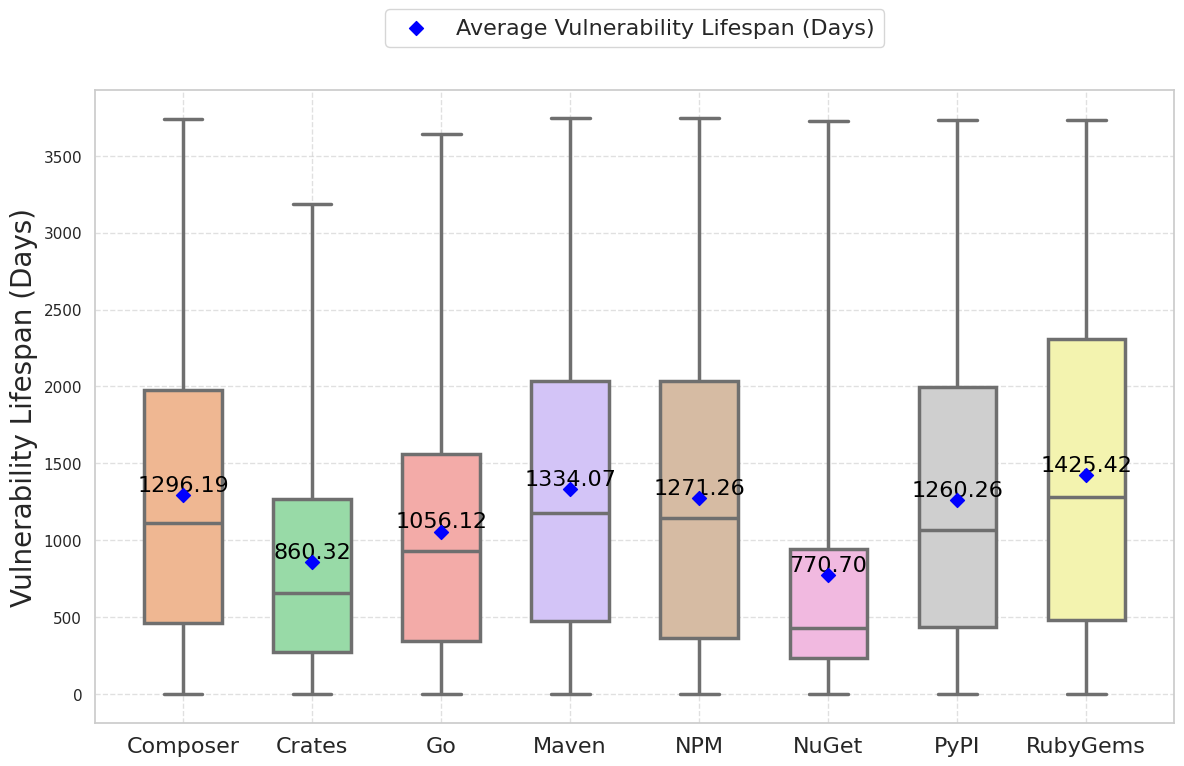

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Assuming df_filtered is already defined
df_2 = df_filtered

# Split the tuple column into separate columns
df_2[['days_from_vuln_to_fix', 'days_from_dis_to_fix', 'days_from_pub_to_fix']] = pd.DataFrame(
    df_2['Avg_time_to_fix'].tolist(), index=df_2.index
)

# Calculate the 95th percentile for each column
percentiles = df_2[['days_from_vuln_to_fix', 'days_from_dis_to_fix', 'days_from_pub_to_fix']].quantile(0.95)

# Filter out rows where the values exceed the 95th percentile
filtered_df_2 = df_2[
    (df_2['days_from_vuln_to_fix'] <= percentiles['days_from_vuln_to_fix']) &
    (df_2['days_from_dis_to_fix'] <= percentiles['days_from_dis_to_fix']) &
    (df_2['days_from_pub_to_fix'] <= percentiles['days_from_pub_to_fix'])
]

mean_vuln_liefspan = filtered_df_2.groupby('Platform')['days_from_vuln_to_fix'].mean().reset_index()


# Extract relevant columns for boxplot
metric = 'days_from_vuln_to_fix'

# Set up the figure and axes
fig = plt.figure(figsize=(12, 8))

sns.set(style="whitegrid")
cool_palette = sns.color_palette("pastel")


# Create a boxplot for each metric
# for idx, metric in enumerate(metrics):
filtered_df_2 = filtered_df_2.sort_values(by='Platform')
boxplot = sns.boxplot(x='Platform', y=metric, data=filtered_df_2, palette=cool_palette[1:], linewidth=2.5, width=0.6, showfliers=True, whis=np.inf)
plt.scatter(x=mean_vuln_liefspan['Platform'], y=mean_vuln_liefspan['days_from_vuln_to_fix'], 
        color='blue', marker='D', s=50, label='Average Vulnerability Lifespan (Days)', zorder=5)

for index, row in mean_vuln_liefspan.iterrows():
    plt.text(row['Platform'], row['days_from_vuln_to_fix'], 
            f"{row['days_from_vuln_to_fix']:.2f}", 
            color='black', ha='center', va='bottom', fontsize=16)

# plt.subplot(1, 3, idx + 1)  # Create subplots for each metric
# filtered_df_2.boxplot(column=metric, by='Platform', palette=cool_palette, linewidth=2.5, width=0.6, showfliers=True, whis=np.inf)

# Add labels and titles
# plt.title(f'{metric.replace("_", " ").title()} by Platform')
plt.suptitle("")  # Remove the automatic overarching title
plt.xlabel('', fontsize=16)
plt.ylabel('Vulnerability Lifespan (Days)', fontsize=20)
# plt.xlabel('Platform')
# plt.ylabel('Time (Days)')

plt.xticks(fontsize=16)  # Set x ticks font size

# Add a grid to the plot for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend for the mean points
plt.legend(bbox_to_anchor=(0.5, 1.05), loc='lower center',  fontsize=16)


# Adjust layout
plt.tight_layout()
plt.show()

# fig.savefig('boxplot_vuln_lifespan.pdf')
# fig.savefig('days_from_dis_to_fix.pdf')